<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/8_AdvancedTrainingConcepts/experiments/Cifar10_with_resnet34_LN_OneCycleLR/Cifar10_with_resnet34_LN_OneCycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-y0i8ce5x
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-y0i8ce5x
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98531 sha256=6d7d334e18c27a1312b7745a66c167e5c39798b34ff4d7ccafebff7044405713
  Stored in directory: /tmp/pip-ephem-wheel-cache-747x6bt8/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!git clone https://github.com/gkdivya/torch_cv_wrapper.git

Cloning into 'torch_cv_wrapper'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 252 (delta 145), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (252/252), 59.99 KiB | 4.00 MiB/s, done.
Resolving deltas: 100% (145/145), done.


In [3]:
!git clone https://github.com/gkdivya/eva.git

Cloning into 'eva'...
remote: Enumerating objects: 2253, done.
remote: Counting objects: 100% (1076/1076), done.
remote: Compressing objects: 100% (715/715), done.
remote: Total 2253 (delta 804), reused 336 (delta 336), pack-reused 1177
Receiving objects: 100% (2253/2253), 21.55 MiB | 9.80 MiB/s, done.
Resolving deltas: 100% (1289/1289), done.


In [4]:
from __future__ import print_function
import torchvision
import torch
from pprint import pprint
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

## Import Custom Libraries
from torch_cv_wrapper.utils import plot_metrics,train,test,helper
from torch_cv_wrapper.utils.gradcam import generate_gradcam, plot_gradcam
from torch_cv_wrapper.model import resnet
from torch_cv_wrapper.main import TriggerEngine

## Load config file

In [5]:
config = helper.process_config("/content/eva/8_AdvancedTrainingConcepts/experiments/Cifar10_with_resnet34_LN_OneCycleLR/config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'type': 'CIFAR10Albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                             'truck'],
                 'type': 'Cifar10DataLoader'},
 'lr_scheduler': 'OneCycleLR',
 'model': 'Resnet34',
 'model_params': {'dropout': 0.05,
                  'experiment_name': 'Cifar10_with_resnet34_LN_OneCycleLR',
                  'model_dir': './model/',
                  'seed': 1},
 'optimizer': {'args': {'lr': 0.001}, 'type': 'optim.Adam'},
 'training_pa

## Create Training Instance

In [6]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']
trigger_training=TriggerEngine(config)

## Download data and view sample images

In [7]:
classes= config['data_loader']['classes']

#Get dataloaders
train_loader,test_loader = trigger_training.dataloader()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


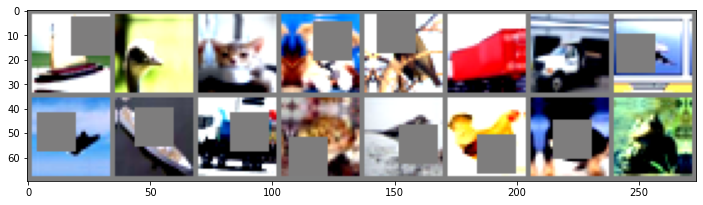

In [8]:
# get some random training images
images, labels = iter(train_loader).next()

# # show images
helper.imshow(torchvision.utils.make_grid(images[:16]))

## Model Summary

In [9]:
model = resnet.ResNet34("LN")
model.to(device)
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
        GroupNorm-14           [-1, 64,

## Trigger training

In [10]:
# trigger_training.
(exp_metrics[experiment_name]) = trigger_training.run_experiment(model,train_loader,test_loader)
#trigger_training.save_experiment(model,experiment_name,"/content/drive/MyDrive/Cifar10_Resnet/saved_models")

  0%|          | 0/196 [00:00<?, ?it/s]

using OneCycleLR
Epoch 1:


Loss=2.0012640953063965 Batch_id=195 LR=0.00006 Accuracy=24.69: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 3563/10000 (35.63%)

Epoch 2:


Loss=1.8916715383529663 Batch_id=195 LR=0.00010 Accuracy=35.15: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 4065/10000 (40.65%)

Epoch 3:


Loss=1.7020057439804077 Batch_id=195 LR=0.00018 Accuracy=39.83: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 4468/10000 (44.68%)

Epoch 4:


Loss=1.523041844367981 Batch_id=195 LR=0.00028 Accuracy=44.12: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 4968/10000 (49.68%)

Epoch 5:


Loss=1.3807768821716309 Batch_id=195 LR=0.00040 Accuracy=46.41: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5328/10000 (53.28%)

Epoch 6:


Loss=1.5705839395523071 Batch_id=195 LR=0.00052 Accuracy=48.98: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 4893/10000 (48.93%)

Epoch 7:


Loss=1.1943851709365845 Batch_id=195 LR=0.00064 Accuracy=53.38: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 5858/10000 (58.58%)

Epoch 8:


Loss=1.1506874561309814 Batch_id=195 LR=0.00076 Accuracy=55.89: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6351/10000 (63.51%)

Epoch 9:


Loss=0.9320464134216309 Batch_id=195 LR=0.00086 Accuracy=58.05: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 5932/10000 (59.32%)

Epoch 10:


Loss=1.246696949005127 Batch_id=195 LR=0.00094 Accuracy=61.04: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6484/10000 (64.84%)

Epoch 11:


Loss=0.7630470991134644 Batch_id=195 LR=0.00098 Accuracy=63.62: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7153/10000 (71.53%)

Epoch 12:


Loss=0.9735420346260071 Batch_id=195 LR=0.00100 Accuracy=66.44: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6885/10000 (68.85%)

Epoch 13:


Loss=0.8953174352645874 Batch_id=195 LR=0.00100 Accuracy=68.74: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7308/10000 (73.08%)

Epoch 14:


Loss=0.7654361128807068 Batch_id=195 LR=0.00099 Accuracy=71.05: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7325/10000 (73.25%)

Epoch 15:


Loss=0.7631914615631104 Batch_id=195 LR=0.00097 Accuracy=72.36: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7537/10000 (75.37%)

Epoch 16:


Loss=0.6549686193466187 Batch_id=195 LR=0.00095 Accuracy=74.19: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7524/10000 (75.24%)

Epoch 17:


Loss=0.6873221397399902 Batch_id=195 LR=0.00092 Accuracy=76.08: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7980/10000 (79.80%)

Epoch 18:


Loss=0.7865720391273499 Batch_id=195 LR=0.00089 Accuracy=77.26: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8253/10000 (82.53%)

Epoch 19:


Loss=0.6472621560096741 Batch_id=195 LR=0.00085 Accuracy=78.67: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8071/10000 (80.71%)

Epoch 20:


Loss=0.8366525769233704 Batch_id=195 LR=0.00081 Accuracy=79.69: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8229/10000 (82.29%)

Epoch 21:


Loss=0.5654183626174927 Batch_id=195 LR=0.00077 Accuracy=80.93: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8560/10000 (85.60%)

Epoch 22:


Loss=0.6497747898101807 Batch_id=195 LR=0.00072 Accuracy=81.82: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8527/10000 (85.27%)

Epoch 23:


Loss=0.35858142375946045 Batch_id=195 LR=0.00066 Accuracy=83.02: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8493/10000 (84.93%)

Epoch 24:


Loss=0.29805058240890503 Batch_id=195 LR=0.00061 Accuracy=84.21: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8415/10000 (84.15%)

Epoch 25:


Loss=0.336852490901947 Batch_id=195 LR=0.00056 Accuracy=84.69: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8696/10000 (86.96%)

Epoch 26:


Loss=0.364798367023468 Batch_id=195 LR=0.00050 Accuracy=86.10: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8729/10000 (87.29%)

Epoch 27:


Loss=0.36272719502449036 Batch_id=195 LR=0.00044 Accuracy=87.00: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8842/10000 (88.42%)

Epoch 28:


Loss=0.1994996964931488 Batch_id=195 LR=0.00039 Accuracy=87.86: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8771/10000 (87.71%)

Epoch 29:


Loss=0.37931954860687256 Batch_id=195 LR=0.00033 Accuracy=88.82: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 8950/10000 (89.50%)

Epoch 30:


Loss=0.3171694576740265 Batch_id=195 LR=0.00028 Accuracy=89.64: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 8947/10000 (89.47%)

Epoch 31:


Loss=0.15287315845489502 Batch_id=195 LR=0.00023 Accuracy=90.41: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 9046/10000 (90.46%)

Epoch 32:


Loss=0.343482106924057 Batch_id=195 LR=0.00019 Accuracy=91.25: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 9028/10000 (90.28%)

Epoch 33:


Loss=0.2769588530063629 Batch_id=195 LR=0.00015 Accuracy=92.00: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9099/10000 (90.99%)

Epoch 34:


Loss=0.29987192153930664 Batch_id=195 LR=0.00011 Accuracy=92.61: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9129/10000 (91.29%)

Epoch 35:


Loss=0.14780467748641968 Batch_id=195 LR=0.00008 Accuracy=93.54: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 9105/10000 (91.05%)

Epoch 36:


Loss=0.2661204934120178 Batch_id=195 LR=0.00005 Accuracy=93.93: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9151/10000 (91.51%)

Epoch 37:


Loss=0.2505386173725128 Batch_id=195 LR=0.00003 Accuracy=94.44: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9171/10000 (91.71%)

Epoch 38:


Loss=0.280290424823761 Batch_id=195 LR=0.00001 Accuracy=94.87: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9196/10000 (91.96%)

Epoch 39:


Loss=0.2058330774307251 Batch_id=195 LR=0.00000 Accuracy=94.79: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9202/10000 (92.02%)

Epoch 40:


Loss=0.0817321240901947 Batch_id=195 LR=0.00000 Accuracy=95.00: 100%|██████████| 196/196 [01:51<00:00,  1.75it/s]



Test set: Average loss: 0.0011, Accuracy: 9202/10000 (92.02%)



## Missclassification

Total wrong predictions are 548
Files already downloaded and verified


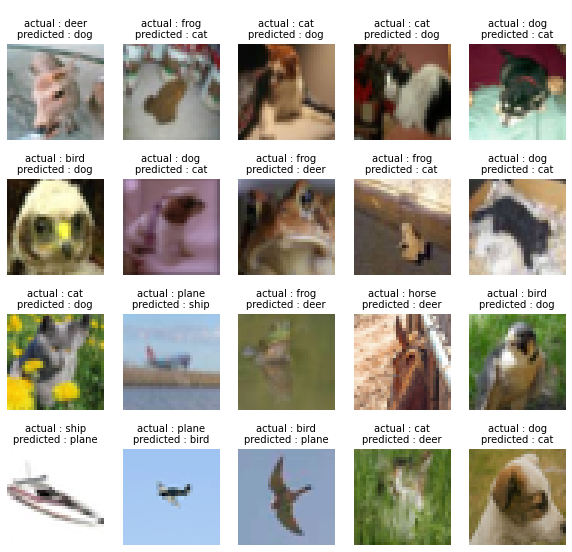

In [ ]:
misclassified_images = trigger_training.wrong_predictions(model,test_loader)

## Plots for Validation Loss and Accuracy

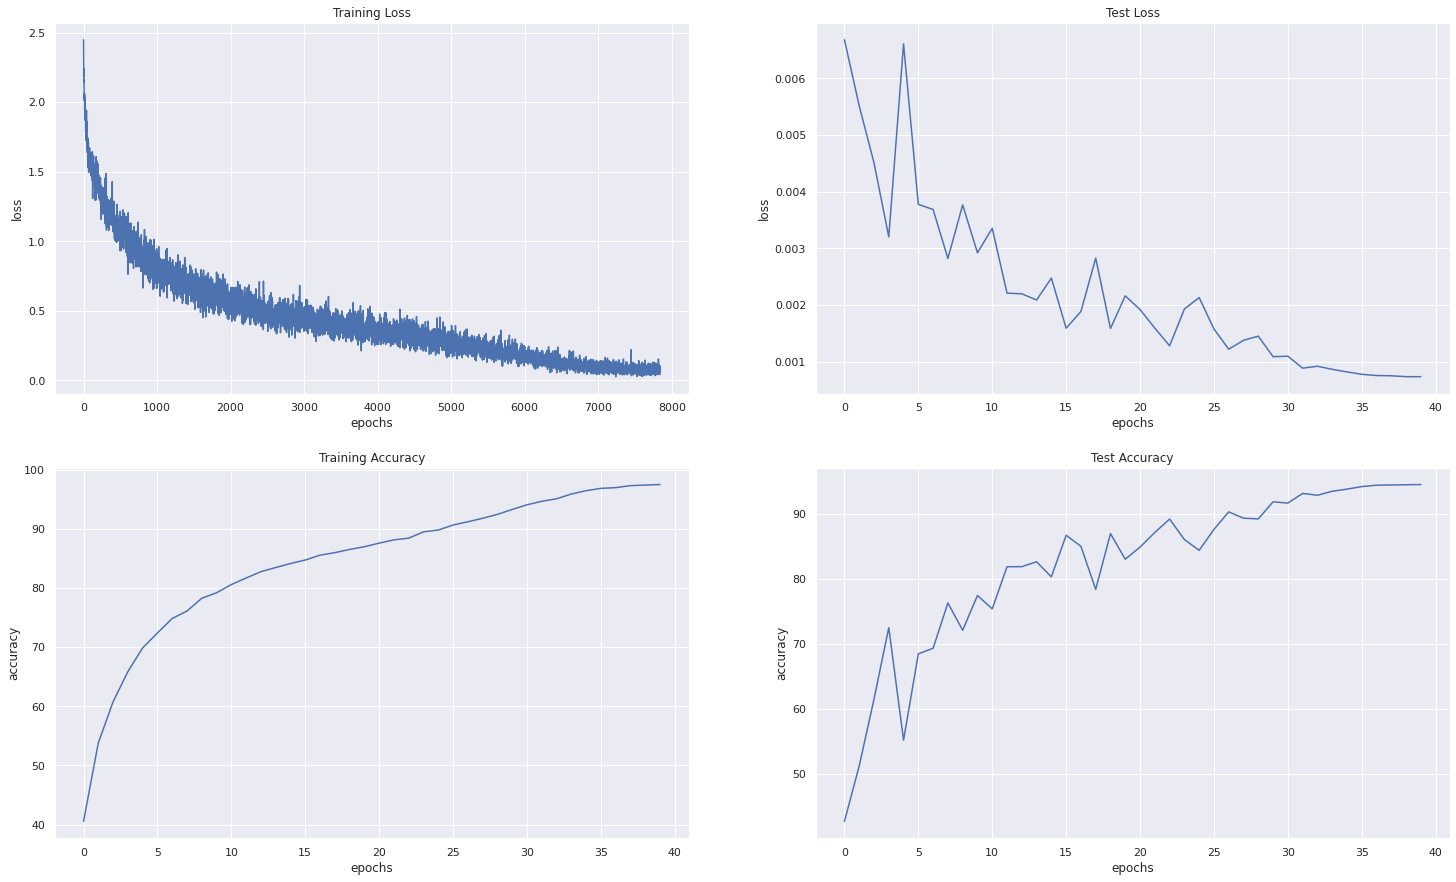

In [ ]:
plot_metrics.plot_metrics(exp_metrics[experiment_name])

## Accuracy for each class

In [ ]:
helper.class_level_accuracy(model, test_loader, device, classes)

Accuracy of plane : 95 %
Accuracy of   car : 97 %
Accuracy of  bird : 91 %
Accuracy of   cat : 88 %
Accuracy of  deer : 95 %
Accuracy of   dog : 90 %
Accuracy of  frog : 96 %
Accuracy of horse : 96 %
Accuracy of  ship : 96 %
Accuracy of truck : 96 %


## Plot Confusion Matrix

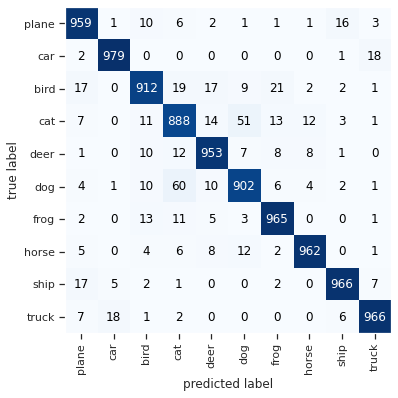

In [ ]:
mat = helper.compute_confusion_matrix(model,test_loader,device)
plot_metrics.plot_confusion_matrix(mat, class_names=classes)


## Generate & Plot GradCam Images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


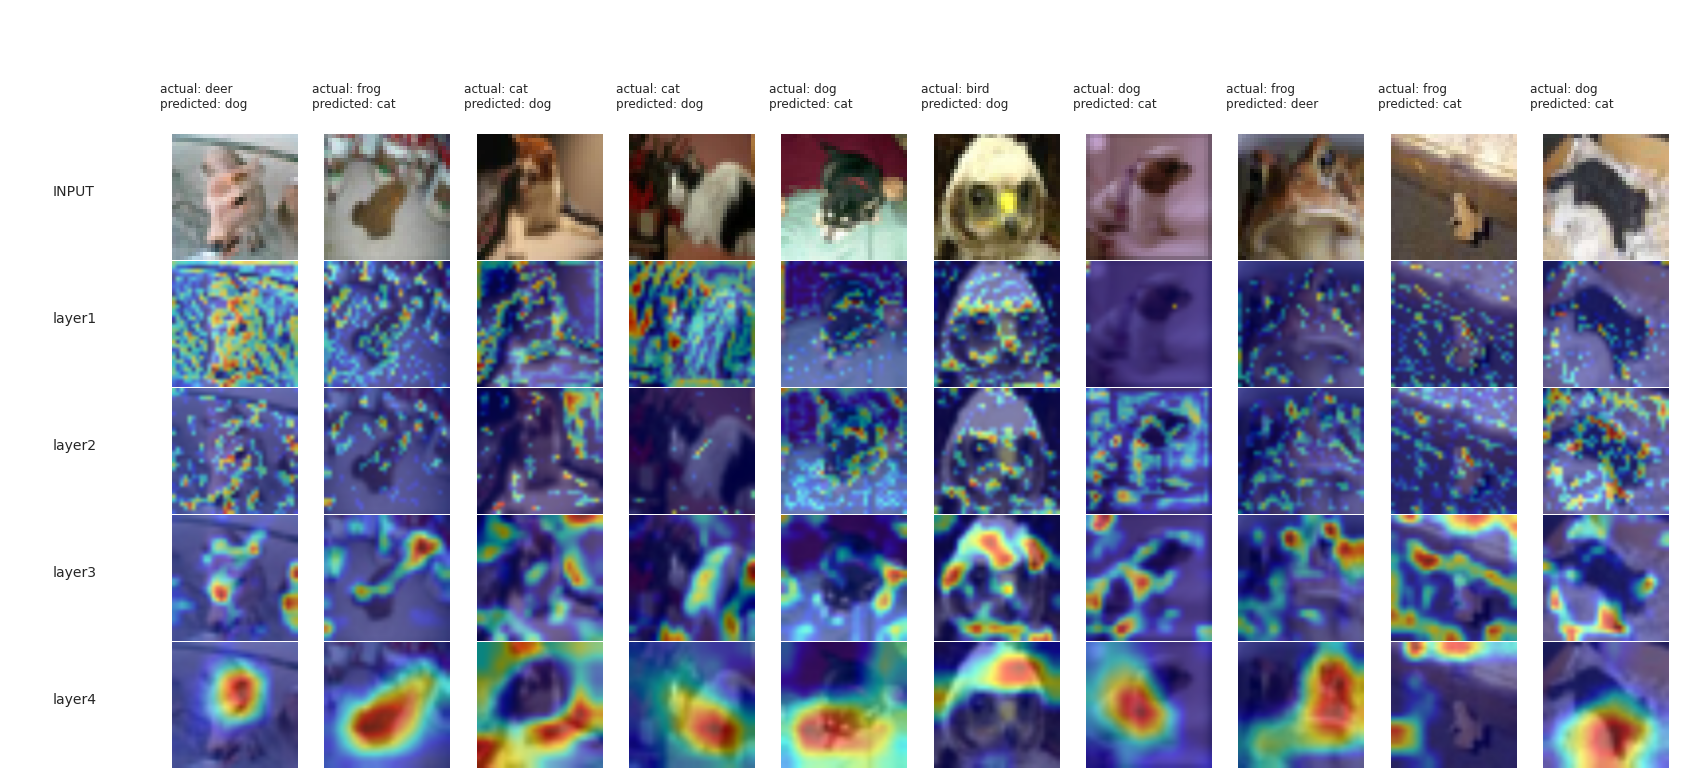

In [ ]:
target_layers = ["layer1","layer2","layer3","layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[:10], model, target_layers,device)
plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[:10])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


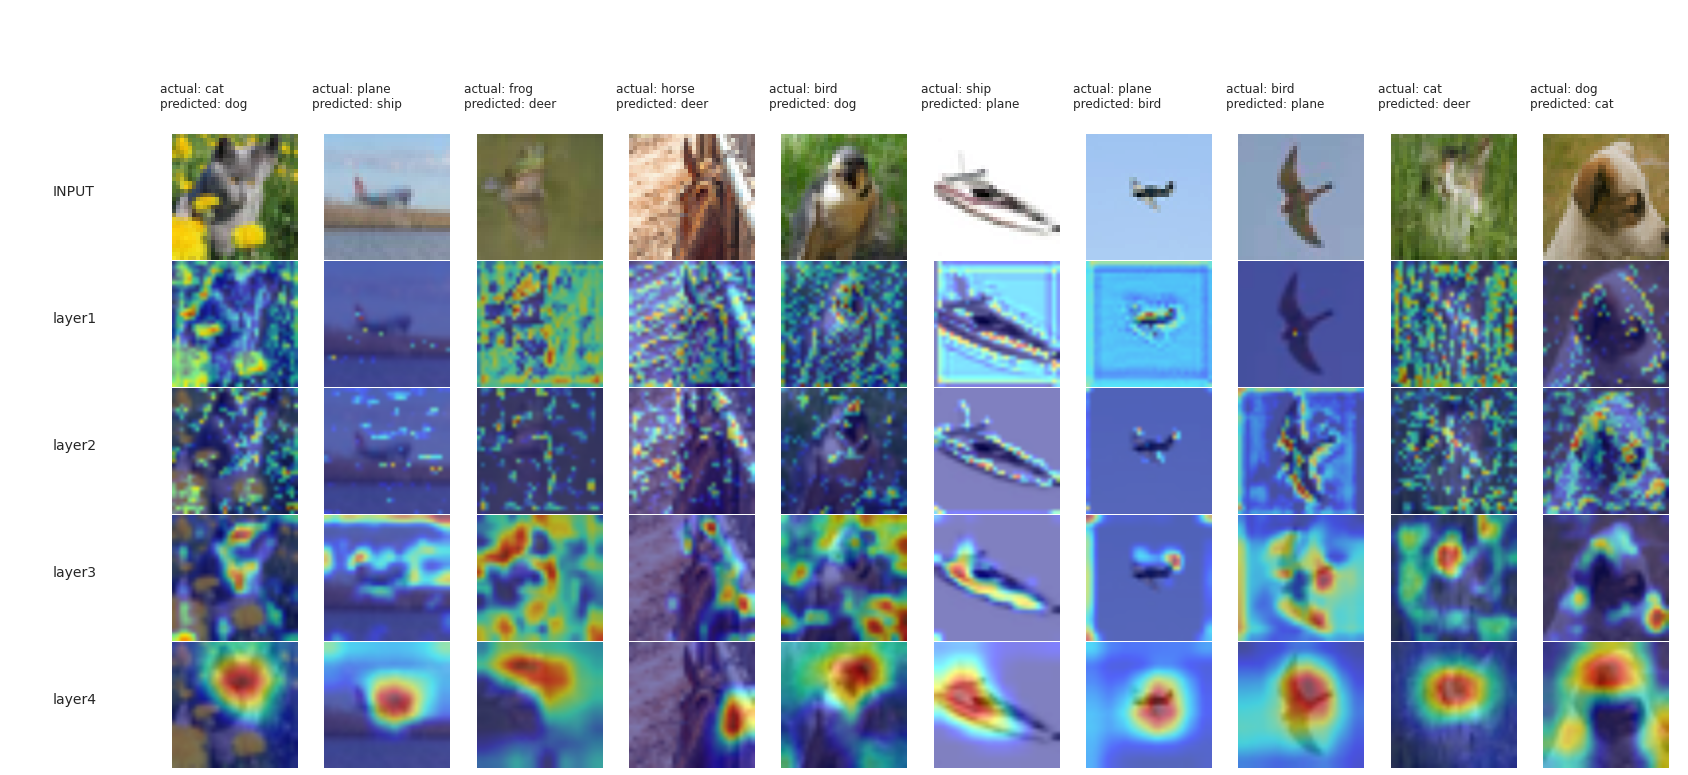

In [ ]:
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[10:20], model, target_layers,device)
plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[10:20])

In [ ]:

%load_ext tensorboard
%tensorboard --logdir=runs